In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
# Define the dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([0, 0, 1, 1, 1])

# Define the model
model = LogisticRegression()

# Define the k-Fold Cross Validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to store the accuracy scores
accuracy_scores = []

# Iterate over the k folds
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Calculate the average accuracy score
average_accuracy = np.mean(accuracy_scores)

print("Average accuracy:", average_accuracy)


Average accuracy: 0.6


In [3]:
import numpy as np

# Define the actual and predicted values
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.2, 4.1, 5.1])

# Calculate the MSE
mse = np.mean((y_true - y_pred) ** 2)

print("MSE:", mse)


MSE: 0.015999999999999993


A Radial Basis Function (RBF) network is a type of artificial neural network that uses radial basis functions as activation functions. It is a feedforward network with a single hidden layer, where the hidden layer consists of RBF units.

The RBF network is typically used for function approximation, classification, and regression tasks. The network consists of three layers:

1. Input layer: This layer receives the input data.
2. Hidden layer: This layer consists of RBF units, which compute the weighted sum of the input data and a set of basis functions. The basis functions are typically Gaussian functions, but other types of functions can also be used.
3. Output layer: This layer computes the output of the network by taking a linear combination of the outputs of the RBF units.

The RBF network is trained using a two-stage process:

1. The first stage involves selecting the centers and widths of the RBF units. This is typically done using a clustering algorithm, such as k-means.
2. The second stage involves training the output weights of the network using a linear least squares algorithm.

RBF networks have several advantages, including:

* They can be trained quickly and efficiently.
* They can handle high-dimensional data.
* They can be used for both classification and regression tasks.

However, RBF networks also have some disadvantages, including:

* They can be sensitive to the choice of basis functions and their parameters.
* They can be prone to overfitting if the number of RBF units is too large.

Some common applications of RBF networks include:

* Function approximation
* Classification
* Regression
* Time series prediction
* Image processing

Overall, RBF networks are a powerful tool for solving a wide range of problems in machine learning and artificial intelligence.

[![image](https://mohamedbakrey094.medium.com/radial-basis-function-networks-rbfns-be2ec324d8fb)](https://mohamedbakrey094.medium.com/radial-basis-function-networks-rbfns-be2ec324d8fb)

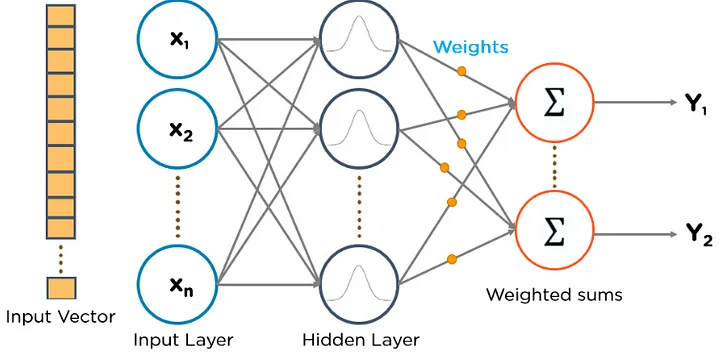

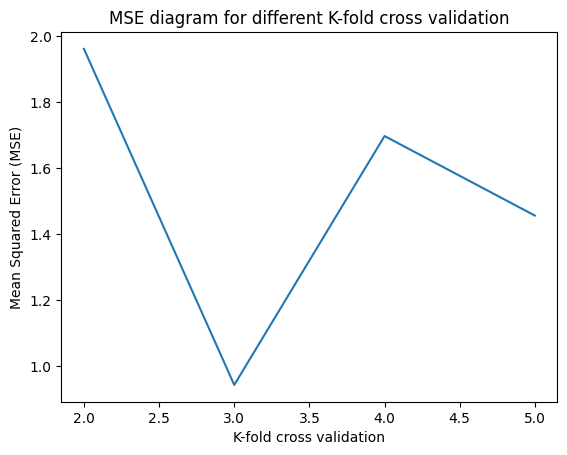

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([2, 4, 5, 4, 5])

# Define the model
model = LinearRegression()

# Define the K-fold cross validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to store the MSE values
mse_values = []

# Iterate over the K-fold cross validation
for k in range(2, 6):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
    mse_values.append(np.mean(mse))

# Plot the MSE diagram
plt.plot(range(2, 6), mse_values)
plt.xlabel('K-fold cross validation')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE diagram for different K-fold cross validation')
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

class RBFNetwork:
    def __init__(self, num_centers, num_outputs):
        self.num_centers = num_centers
        self.num_outputs = num_outputs
        self.centers = None
        self.widths = None
        self.weights = None

    def _gaussian(self, x, center, width):
        return np.exp(-((x - center) / width) ** 2)

    def _rbf(self, x):
        rbf_values = np.zeros((x.shape[0], self.num_centers))
        for i, center in enumerate(self.centers):
            rbf_values[:, i] = self._gaussian(x, center, self.widths[i])
        return rbf_values

    def train(self, inputs, targets):
        self.centers = np.random.choice(inputs.flatten(), size=self.num_centers, replace=True)
        self.widths = np.ones(self.num_centers)
        self.weights = np.linalg.pinv(self._rbf(inputs)).dot(targets)

    def predict(self, inputs):
        return self._rbf(inputs).dot(self.weights)

# Define the dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([2, 4, 5, 4, 5])

# Define the RBF network
rbf_network = RBFNetwork(num_centers=5, num_outputs=1)

# Define the K-fold cross validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to store the MSE values
mse_values = []

# Iterate over the K-fold cross validation
for k in range(2, 6):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rbf_network.train(X_train, y_train)
        y_pred = rbf_network.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
    mse_values.append(np.mean(mse))

# Plot the MSE diagram
plt.plot(range(2, 6), mse_values)
plt.xlabel('K-fold cross validation')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE diagram for different K-fold cross validation')
plt.show()


ValueError: could not broadcast input array from shape (2,2) into shape (2,)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

class RBFNetwork:
    def __init__(self, num_centers, num_outputs):
        self.num_centers = num_centers
        self.num_outputs = num_outputs
        self.centers = None
        self.widths = None
        self.weights = None

    def _gaussian(self, x, center, width):
        return np.exp(-((x - center) ** 2).sum(axis=1) / (2 * width ** 2))

    def _rbf(self, x):
        rbf_values = np.zeros((x.shape[0], self.num_centers))
        for i, center in enumerate(self.centers):
            rbf_values[:, i] = self._gaussian(x, center, self.widths[i])
        return rbf_values

    def train(self, inputs, targets):
        self.centers = np.random.choice(inputs.flatten(), size=self.num_centers, replace=True).reshape(-1, inputs.shape[1])
        self.widths = np.ones(self.num_centers)
        self.weights = np.linalg.pinv(self._rbf(inputs)).dot(targets)

    def predict(self, inputs):
        return self._rbf(inputs).dot(self.weights)

# Define the dataset
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([2, 4, 5, 4, 5])

# Define the RBF network
rbf_network = RBFNetwork(num_centers=5, num_outputs=1)

# Define the K-fold cross validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the list to store the MSE values
mse_values = []

# Iterate over the K-fold cross validation
for k in range(2, 6):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rbf_network.train(X_train, y_train)
        y_pred = rbf_network.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
    mse_values.append(np.mean(mse))

# Plot the MSE diagram
plt.plot(range(2, 6), mse_values)
plt.xlabel('K-fold cross validation')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE diagram for different K-fold cross validation')
plt.show()

ValueError: cannot reshape array of size 5 into shape (2)

# K-Fold
https://medium.com/@ompramod9921/cross-validation-623620ff84c2
https://miro.medium.com/v2/resize:fit:720/format:webp/1*lOZqYqwmuW1lg6fitwqXxA.png
Stratified k-fold cross validation
Leave-P-Out (LPO) cross-validation
Repeated k-Fold cross-validation or Repeated random sub-sampling CV

RBF
https://mohamedbakrey094.medium.com/radial-basis-function-networks-rbfns-be2ec324d8fb
https://miro.medium.com/v2/resize:fit:720/format:webp/0*mp0pMIFZd2MuqLxX

In [11]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert the labels to categorical
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)
y_test_class = y_test.argmax(axis=1)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Test accuracy: {accuracy:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 1s - 277ms/step - accuracy: 0.3583 - loss: 1.1070
Epoch 2/10
4/4 - 0s - 7ms/step - accuracy: 0.3250 - loss: 1.0478
Epoch 3/10
4/4 - 0s - 7ms/step - accuracy: 0.4083 - loss: 1.0218
Epoch 4/10
4/4 - 0s - 10ms/step - accuracy: 0.6500 - loss: 0.9693
Epoch 5/10
4/4 - 0s - 8ms/step - accuracy: 0.7583 - loss: 0.9336
Epoch 6/10
4/4 - 0s - 14ms/step - accuracy: 0.7500 - loss: 0.9089
Epoch 7/10
4/4 - 0s - 15ms/step - accuracy: 0.7583 - loss: 0.8830
Epoch 8/10
4/4 - 0s - 8ms/step - accuracy: 0.6750 - loss: 0.8543
Epoch 9/10
4/4 - 0s - 7ms/step - accuracy: 0.6667 - loss: 0.8286
Epoch 10/10
4/4 - 0s - 8ms/step - accuracy: 0.7583 - loss: 0.8016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Test accuracy: 0.87


Multilayer Perceptron (MLP) and Radial Basis Function (RBF) are both types of artificial neural networks used for classification and regression tasks. Here's a comparison of the two:

Similarities:

    Both MLP and RBF are supervised learning algorithms.
    Both can be used for classification and regression tasks.
    Both can learn complex relationships between inputs and outputs.

Differences:

    Architecture: MLP has a feedforward architecture with multiple layers of neurons, whereas RBF has a single layer of neurons with a radial basis function (RBF) as the activation function.
    Activation Function: MLP uses a sigmoid or ReLU activation function, whereas RBF uses a radial basis function (e.g., Gaussian or multiquadric).
    Training: MLP is trained using backpropagation, whereas RBF is trained using a combination of unsupervised and supervised learning.
    Complexity: MLP can learn more complex relationships between inputs and outputs, but can be prone to overfitting. RBF is less prone to overfitting, but may not be able to learn as complex relationships.
    Interpretability: RBF is more interpretable than MLP, as the RBF centers and widths can be visualized and understood.
    Computational Cost: RBF is generally faster to train than MLP, especially for large datasets.
    Local vs. Global: RBF is a local model, meaning that it focuses on the local structure of the data, whereas MLP is a global model, meaning that it tries to capture the global structure of the data.

When to use each:

    Use MLP when:
        You have a large dataset with complex relationships between inputs and outputs.
        You need to learn non-linear relationships between inputs and outputs.
        You have a high-dimensional input space.
    Use RBF when:
        You have a small to medium-sized dataset with local structure.
        You need to learn smooth, continuous relationships between inputs and outputs.
        You want a more interpretable model.

In summary, MLP is a more powerful and flexible model, but can be prone to overfitting and is computationally expensive. RBF is a simpler, more interpretable model that is less prone to overfitting, but may not be able to learn as complex relationships. The choice between MLP and RBF depends on the specific problem and dataset.

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP model
def create_mlp(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(50, activation='relu', input_dim=input_dim))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(output_dim))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the k-fold cross-validation
def kfold_cv(X, y, K):
    kf = KFold(n_splits=K, shuffle=True, random_state=42)
    mse_values = []
    for train_index, test_index in kf.split(X):
        # X_train, X_test = X[train_index], X[test_index]
        # y_train, y_test = y[train_index], y[test_index]
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = create_mlp(X.shape[1], y.shape[1])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
    return mse_values


In [14]:
#---------------------------------------------
# Load the data
# X = ...
# y = ...
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# # metadata
# print(abalone.metadata)

# # variable information
# print(abalone.variables)
#------------------------------------------

In [15]:
print(X['Sex'].unique())
X[0:5]

['M' 'F' 'I']


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [17]:
import numpy as np
# X['Sex'] = np.where(X['Sex'] == 'M', 0, np.where(X['Sex'] == 'Female', 1, 2))
X['Sex'] = X['Sex'].replace('M', 0)
X['Sex'] = X['Sex'].replace('F', 1)
X['Sex'] = X['Sex'].replace('I', 2)
X[0:5]

<ipython-input-17-261952a3a43b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].replace('M', 0)
<ipython-input-17-261952a3a43b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].replace('F', 1)
<ipython-input-17-261952a3a43b>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futur

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [50]:
# Define the hyperparameters
input_dim = X.shape[1]
output_dim = y.shape[1]
K=2
kf = KFold(n_splits=K, shuffle=True, random_state=42)
mse_values = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = create_mlp(X.shape[1], y.shape[1])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     mse_values.append(mse)
# mse_values = kfold_cv(X, y, 2)


ValueError: could not convert string to float: 'M'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


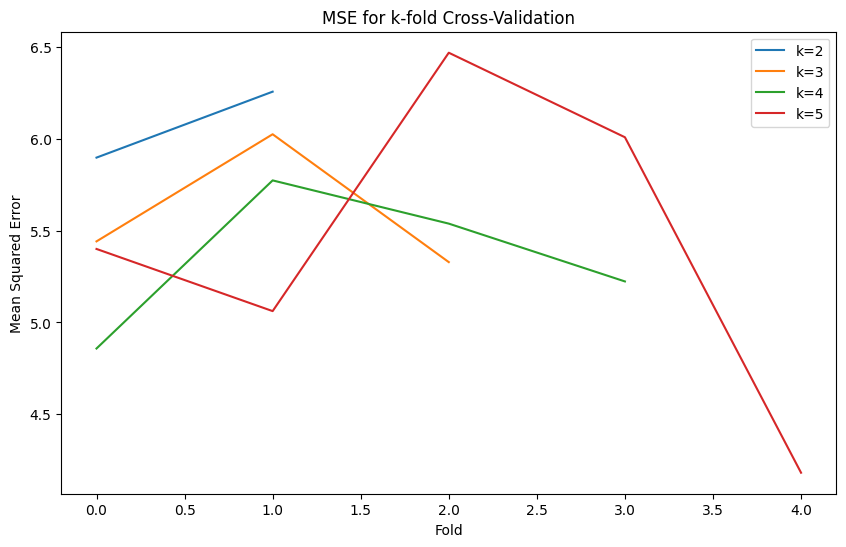

In [20]:
# Define the hyperparameters
input_dim = X.shape[1]
output_dim = y.shape[1]

# Perform k-fold cross-validation for k ranging from 2 to 5
mse_values_dict = dict()
for k in range(2, 6):
    mse_values = kfold_cv(X, y, k)
    mse_values_dict[k] = mse_values

# Plot the MSE values
plt.figure(figsize=(10, 6))
for k, mse_values in mse_values_dict.items():
    plt.plot(mse_values, label=f'k={k}')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('MSE for k-fold Cross-Validation')
plt.legend()
plt.show()


In [8]:
# Plot the MSE values
plt.figure(figsize=(10, 6))
for k, mse_values in mse_values_dict.items():
    plt.plot(mse_values, label=f'k={k}')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('MSE for k-fold Cross-Validation')
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [6]:
import numpy as np
from sklearn.model_selection import KFold

import numpy as np

class RBFNetwork:
    def __init__(self, num_centers, num_outputs):
        self.num_centers = num_centers
        self.num_outputs = num_outputs
        self.centers = None
        self.widths = None
        self.weights = None

    def _rbf(self, x, center, width):
        return np.exp(-((x - center) / width) ** 2)

    def _rbf_layer(self, x):
        return np.array([self._rbf(x, center, width) for center, width in zip(self.centers, self.widths)])

    def train(self, x_train, y_train):
        # Initialize centers using k-means clustering
        self.centers = np.random.choice(x_train, size=self.num_centers, replace=False)
        for _ in range(100):
            distances = np.linalg.norm(x_train[:, np.newaxis] - self.centers, axis=2)
            labels = np.argmin(distances, axis=1)
            new_centers = np.array([x_train[labels == i].mean(axis=0) for i in range(self.num_centers)])
            if np.all(self.centers == new_centers):
                break
            self.centers = new_centers

        # Calculate widths
        self.widths = np.array([np.linalg.norm(x_train - center, axis=1).mean() for center in self.centers])

        # Calculate weights
        rbf_layer = self._rbf_layer(x_train)
        self.weights = np.linalg.pinv(rbf_layer).dot(y_train)

    def predict(self, x_test):
        rbf_layer = self._rbf_layer(x_test)
        return rbf_layer.dot(self.weights)

# # Example usage
# np.random.seed(0)
# x_train = np.random.rand(100, 2)
# y_train = np.sin(x_train[:, 0]) + np.cos(x_train[:, 1])
# x_test = np.random.rand(10, 2)

# rbf_network = RBFNetwork(num_centers=10, num_outputs=1)
# rbf_network.train(x_train, y_train)
# y_pred = rbf_network.predict(x_test)
# print(y_pred)

def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

# import numpy as np
# def mse(actual, predicted):
#     return np.mean((actual - predicted) ** 2)

# # Example usage
# actual = np.array([1, 2, 3, 4, 5])
# predicted = np.array([1.1, 1.9, 3.2, 4.1, 5.1])
# mse_value = mse(actual, predicted)
# print(mse_value)

# rbf_network = RBFNetwork(num_centers=10, num_outputs=1)
# rbf_network.train(x_train, y_train)
# y_pred = rbf_network.predict(x_test)
# mse_value = mse(y_test, y_pred)
# print(mse_value)

def k_fold_cross_validation(x, y, k, num_centers):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_values = []

    for train_index, test_index in kf.split(x.shape[0]):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        rbf_network = RBFNetwork(num_centers=num_centers, num_outputs=1)
        rbf_network.train(x_train, y_train)
        y_pred = rbf_network.predict(x_test)

        mse_value = mse(y_test, y_pred)
        mse_values.append(mse_value)

    return np.mean(mse_values)


In [7]:
np.random.seed(0)
x = np.random.rand(100, 2)
y = np.sin(x[:, 0]) + np.cos(x[:, 1])

num_centers = 10
k_values = range(2, 6)

for k in k_values:
    mse_value = k_fold_cross_validation(x, y, k, num_centers)
    print(f"k={k}, MSE={mse_value:.4f}")

TypeError: Singleton array array(100) cannot be considered a valid collection.